In [30]:
from sklearn.datasets import make_friedman1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import pandas as pd

In [31]:
X, y = make_friedman1(n_samples=500, noise=0.1, random_state=42)

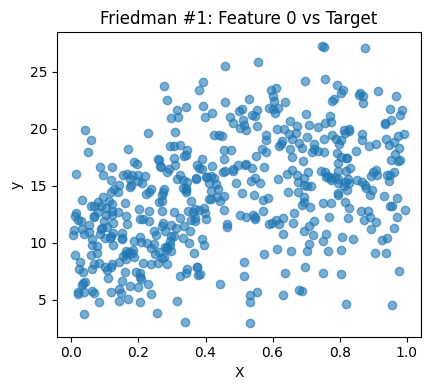

In [32]:
# Plot Friedman #1 (first feature vs target)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], y, alpha=0.6)
plt.title('Friedman #1: Feature 0 vs Target')
plt.xlabel('X'); plt.ylabel('y')

plt.tight_layout()
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5]
results = {}

for degree in degrees:
    if degree == 1:
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        poly_model.fit(X_train, y_train)
        y_pred = poly_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[degree] = {'MSE': mse, 'R²': r2}
    print(f"Degree {degree}: MSE = {mse:.4f}, R² = {r2:.4f}")

results_df = pd.DataFrame(results).T

Degree 1: MSE = 4.5601, R² = 0.7791
Degree 2: MSE = 1.8362, R² = 0.9111
Degree 3: MSE = 0.5542, R² = 0.9732
Degree 4: MSE = 0.2744, R² = 0.9867
Degree 5: MSE = 0.3220, R² = 0.9844


Best polynomial degree: 4 (R² = 0.9867)


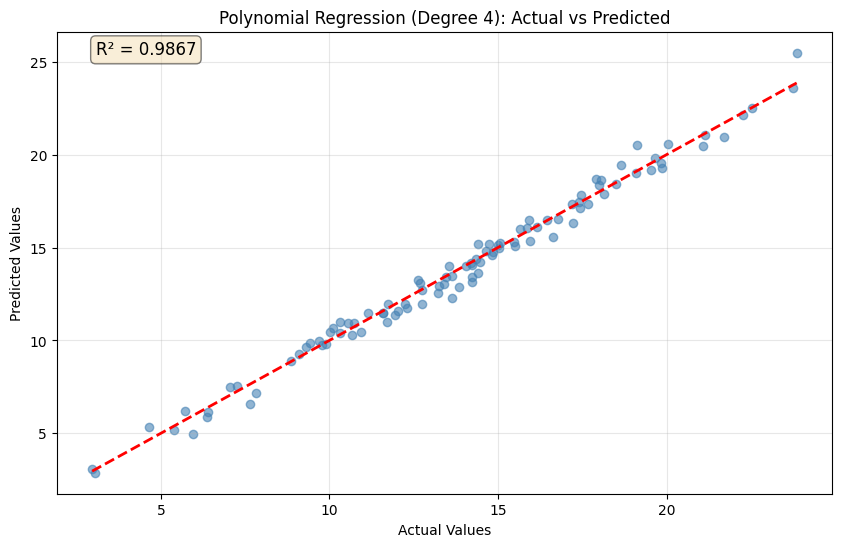

In [34]:
best_degree = max(results.keys(), key=lambda x: results[x]['R²'])
print(f"Best polynomial degree: {best_degree} (R² = {results[best_degree]['R²']:.4f})")

best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Polynomial Regression (Degree {best_degree}): Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.text(0.05, 0.95, f'R² = {results[best_degree]["R²"]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

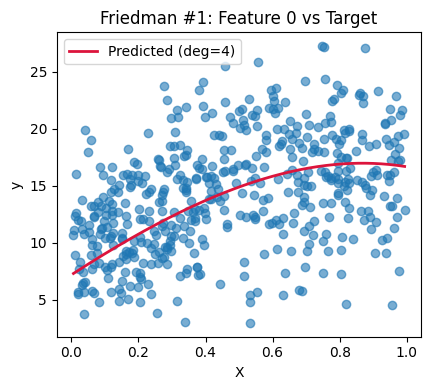

In [35]:

plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(X[:, 0], y, alpha=0.6)
ax.set_title('Friedman #1: Feature 0 vs Target')
ax.set_xlabel('X'); ax.set_ylabel('y')

x_min, x_max = X[:, 0].min(), X[:, 0].max()
x_smooth = np.linspace(x_min, x_max, 300)
X_curve = np.tile(X.mean(axis=0), (len(x_smooth), 1))
X_curve[:, 0] = x_smooth
y_curve = best_model.predict(X_curve)

ax.plot(x_smooth, y_curve, color='crimson', linewidth=2, label=f'Predicted (deg={best_degree})')
ax.legend()

plt.tight_layout()
plt.show()